# Exercise - Analyzing Data Science Job Demand

In [106]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [107]:
df_Ind = df[df['job_country'] == 'India'].copy()

In [108]:
df_Ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [109]:
df_Ind['job_posted_month'] = df_Ind['job_posted_date'].dt.strftime('%B') # using dt extractor to change the format into Months - using str format time function and %B as it is a directive.

In [110]:
df_Ind

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'...",June
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",April
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None,March
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'...",July
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari...",November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}",March
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,March
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}",March
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None,March


In [111]:
# Now we need to pivot our data necessary to plot it.

df_Ind.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [112]:
# as far as we know we can sort it ascending or descending there is no option to sort it chronologically.
# we need to a new column to sort months.

df_Ind_pivot = df_Ind.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [113]:
df_Ind_pivot.reset_index()

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,170,32,418,1566,946,54,86,375,194,169
1,August,189,25,618,1407,1157,47,126,343,235,148
2,December,186,27,648,1464,1206,94,77,343,200,133
3,February,143,35,433,1631,932,42,94,313,165,157
4,January,175,31,628,2132,1444,70,127,448,269,192
5,July,142,25,457,1528,1123,54,75,359,204,155
6,June,146,26,367,1632,1129,41,66,427,238,125
7,March,116,37,422,1591,1005,34,96,351,194,180
8,May,103,14,278,1384,837,31,59,329,134,98
9,November,192,29,722,1743,1614,52,125,423,278,139


In [114]:
# it will assume it as 1900 since we haven't defined the year previously.

df_Ind_pivot.reset_index(inplace=True)
df_Ind_pivot['month_no'] = pd.to_datetime(df_Ind_pivot['job_posted_month'], format='%B').dt.month # using an excessor we get only the values for month.

df_Ind_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [119]:
df_Ind_pivot.sort_values('month_no', inplace=True)

In [120]:
df_Ind_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,175,31,628,2132,1444,70,127,448,269,192,1
3,February,143,35,433,1631,932,42,94,313,165,157,2
7,March,116,37,422,1591,1005,34,96,351,194,180,3
0,April,170,32,418,1566,946,54,86,375,194,169,4
8,May,103,14,278,1384,837,31,59,329,134,98,5
6,June,146,26,367,1632,1129,41,66,427,238,125,6
5,July,142,25,457,1528,1123,54,75,359,204,155,7
1,August,189,25,618,1407,1157,47,126,343,235,148,8
11,September,155,34,630,1508,984,67,85,324,195,132,9
10,October,170,36,500,1476,902,85,67,318,180,167,10


In [121]:
df_Ind_pivot.set_index('job_posted_month', inplace=True)
df_Ind_pivot.drop(columns='month_no', inplace=True)

In [122]:
df_Ind_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


<Axes: xlabel='job_posted_month'>

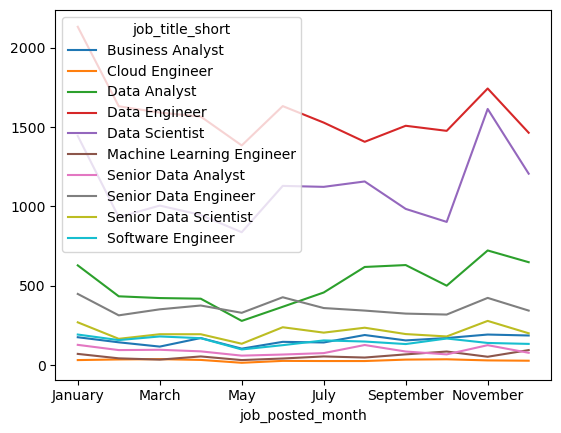

In [123]:
df_Ind_pivot.plot(kind='line')

In [124]:
# Since the above graph is so cluttered lets make a plot with the top 3 jobs in demand.

top_3 = df_Ind['job_title_short'].value_counts().head(3)  # specifying  we require only the top three based on counts.

top_3

job_title_short
Data Engineer     19062
Data Scientist    13279
Data Analyst       6121
Name: count, dtype: int64

In [ ]:
top_3.index # to only get the names.   

Index(['Data Engineer', 'Data Scientist', 'Data Analyst'], dtype='object', name='job_title_short')

In [127]:
top_3 = top_3.index.tolist() # convert to a list to get the cols names only

Text(0.5, 1.0, 'Monthly Job Postings for Top Data Jobs in India')

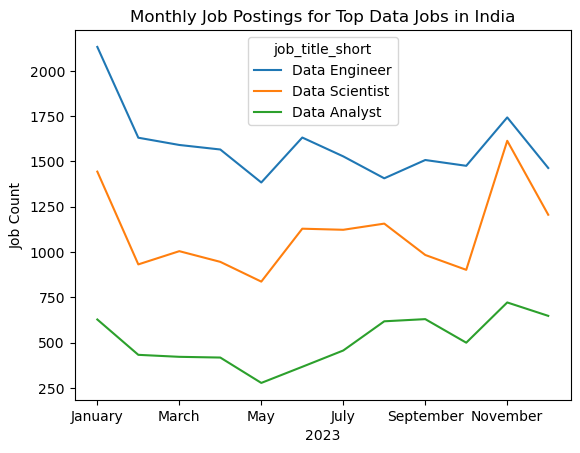

In [129]:
df_Ind_pivot[top_3].plot(kind='line')
plt.ylabel('Job Count')
plt.xlabel('2023')
plt.title('Monthly Job Postings for Top Data Jobs in India')